In [10]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import pickle 
from ply import write_ply

from scipy.special import sph_harm

from utilities import *
from VoxelGrid import *
import os


from skimage.metrics import peak_signal_noise_ratio

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device='cuda' if torch.cuda.is_available() else 'cpu'

N_points=200

In [11]:
dataset  = "chair"
test_focal, test_c2w, test_gt = get_data("../nerf_synthetic/"+dataset, "test")

LOAD DATA ../nerf_synthetic/chair/test


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 49.22it/s]


In [12]:
red = 8
disp_ims_test, disp_rays_test = reduce_data(test_c2w, test_gt,test_focal, red)
disp_im_w = disp_ims_test[0].shape[0]

In [34]:
VG = VoxelGrid()
VG.load("chair_carve3.obj")
#VG.save_pointcloud()

In [35]:
compute_psnr(VG, disp_rays_test, disp_ims_test, 1800)

100%|█████████████████████████████████████████| 200/200 [00:16<00:00, 12.31it/s]


23.619171643323345

In [62]:
VG.save_pointcloud()

In [52]:
VG2 = VoxelGridInterp(128,1.4)
with torch.no_grad():
    VG2.colors[:]=VG.colors
    VG2.opacities[:]=VG.opacities

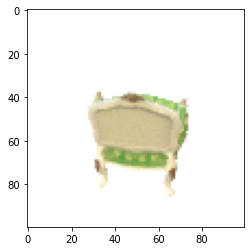

In [19]:
plt.imshow(VG.render_large_image_from_rays(disp_rays_test[2], (1800, 1.2)))

In [34]:
def rolling_average2(p, k=100):
    p2 = np.zeros((p.shape[0]-k))
    for i in range(p.shape[0]-k):
        p2[i] = p[i:i+k].sum()/k
    return p2

def rolling_average(p, k=100):
    p2 = np.zeros((p.shape[0]-k))
    for i in range(k):
        p2 += p[i:-(k-i)]
    return p2/k


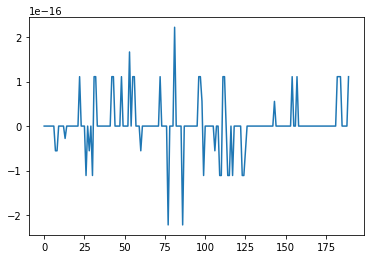

In [37]:
m = np.random.random(200)
plt.plot(rolling_average(m,10)-rolling_average2(m,10))


In [58]:
directories = [e for e in os.listdir("../nerf_synthetic") if os.path.isdir("../nerf_synthetic/"+e)]

for nerf_dir in directories:
    VG = VoxelGrid()
    VG.load(nerf_dir+".obj")
    test_focal, test_c2w, test_gt = get_data("../nerf_synthetic/"+nerf_dir, "test")
    red = 8
    disp_ims_test, disp_rays_test = reduce_data(test_c2w, test_gt,test_focal, red)
    disp_im_w = disp_ims_test[0].shape[0]
    print(nerf_dir, compute_psnr(VG, disp_rays_test, disp_ims_test))

In [4]:
directories = [e for e in os.listdir("../nerf_synthetic") if os.path.isdir("../nerf_synthetic/"+e)]



In [5]:
directories

['materials', 'drums', 'chair', 'mic', 'hotdog', 'lego', 'ficus', 'ship']

In [8]:
L=""
for d in directories:
    L+= "python psnr.py -grid " +  d + "_carve -dataset ../nerf_synthetic/" +d+"/  >> out.txt ;"

In [9]:
L

'python psnr.py -grid materials_carve -dataset ../nerf_synthetic/materials/  >> out.txt ;python psnr.py -grid drums_carve -dataset ../nerf_synthetic/drums/  >> out.txt ;python psnr.py -grid chair_carve -dataset ../nerf_synthetic/chair/  >> out.txt ;python psnr.py -grid mic_carve -dataset ../nerf_synthetic/mic/  >> out.txt ;python psnr.py -grid hotdog_carve -dataset ../nerf_synthetic/hotdog/  >> out.txt ;python psnr.py -grid lego_carve -dataset ../nerf_synthetic/lego/  >> out.txt ;python psnr.py -grid ficus_carve -dataset ../nerf_synthetic/ficus/  >> out.txt ;python psnr.py -grid ship_carve -dataset ../nerf_synthetic/ship/  >> out.txt ;'

In [42]:
L="""materials_carve
19.715238106142714
drums_carve
19.31510048759956
chair_carve
24.226637196980764
mic_carve
20.637249206669086
hotdog_carve
23.454446391118346
lego_carve
20.72228419657665
ficus_carve
21.904822869298773
ship_carve
20.253086117759086
""".split()[::5]

In [47]:
np.array(L).astype(float).std()

1.6541354802551662